# __Classification of Music Lyrics for Artists and Songs (I've) played since 2016__

# Introduction

Music streaming has uppended the music industry in irreversable ways. Gone are the days of cd distribution and mp3 players with capacity constraints. Today, consumers can access nearly any song ever create - from top artists to recently-minted SoundCloud singer.

Instant access to music with significantly less financial barriers supports the experimentation and exploration of various music forms that conusmers would have passed on in previous phases. Given this, it is helpful to understand how listeners consume music: which genres, artists, and - because there is less emphasis on records - which songs and content. On content, the messages that are or aren't conveyed in music can speak to an artists strategic and creative approach. The following will explore the content in today's music through a process of Natural Language Processing analysis.

## Project outline

1. Obtain my music listening history data from Apple Music through a database request. More seamless process than using the API. 
2. Obtain music lyrics for each song and artist pair in my listening history data set by using the Genius API.
3. Tokenize and vectorize my text data for initial insights on most frequesnt bigram and trigram phrases. Additionally, I'd like to analyze changes over time and by genre.
4. Build and train a recurrent, bidirectional neural network to classify Genres and Artist.
5. Compare the performance of all approaches.


# Data analysis

__Plot the artists and songs with highest frequency__

_Artist frequency_

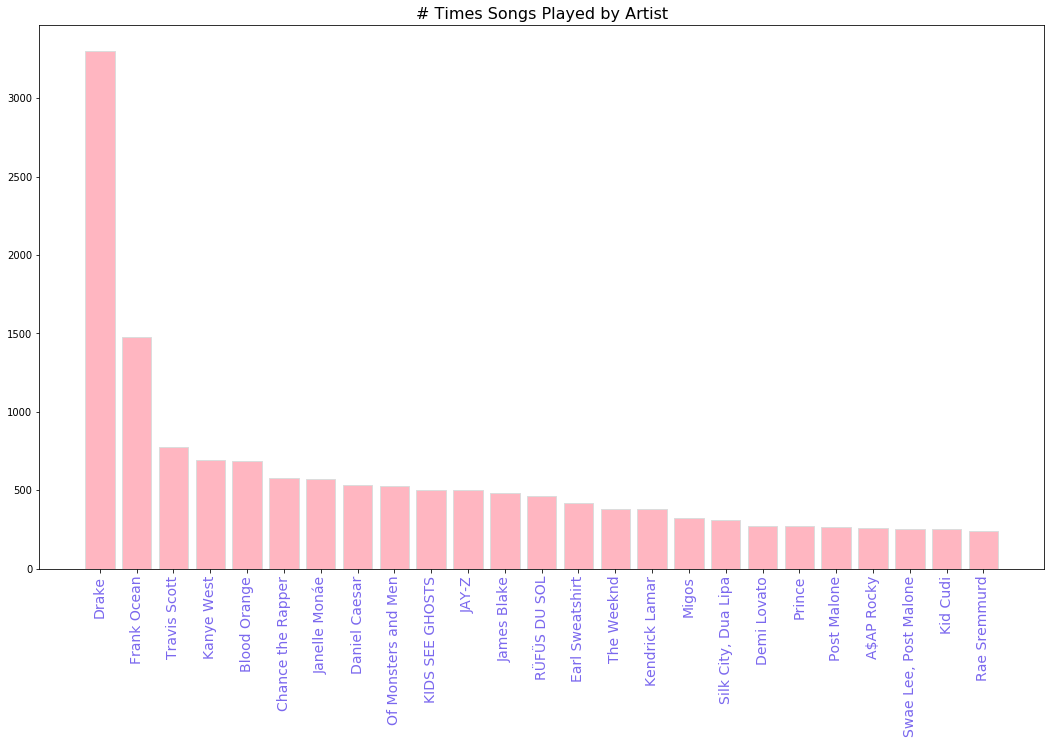

In [44]:
plt.figure(figsize=(18,10))
plt.bar(artist_freq['Artist Name'][:25], artist_freq['Content Name'][:25], color='lightpink', edgecolor='gainsboro')
plt.xticks(rotation=90)
plt.style.use('fast')
plt.title('# Times Songs Played by Artist', fontname = 'Helvetica', fontsize = 16)   
plt.xticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')    
plt.show()

Drake was played more than twice as much as next most frequently played artist, and more than Frank Ocean, Travis Scott, and Kanye West combined.

_Song frequency_

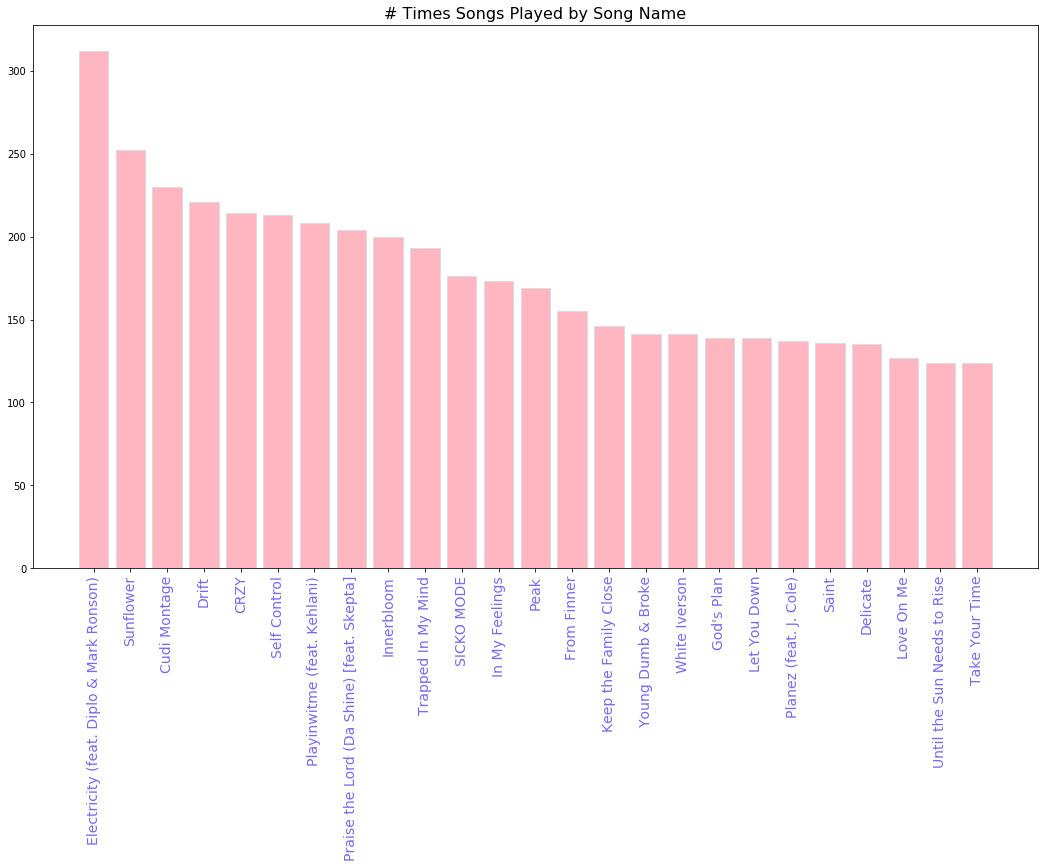

In [45]:
plt.figure(figsize=(18, 10))
plt.bar(song_freq['Content Name'][:25], song_freq['Apple Id Number'][:25], color='lightpink', edgecolor='gainsboro')
plt.xticks(rotation=90, fontsize=14, color='mediumslateblue', fontname ='Heltivica light')
plt.title('# Times Songs Played by Song Name', fontname = 'Helvetica', fontsize = 16)
plt.style.use('fast')
plt.show()

Although released later than most songs, Electricity has the most plays, at over 300 listens.

As mentioned earlier, I'll focus on the extent of association of a song's lyrics with it's listed genre. Since the Genre column is a target variable, I'll examine the various classes and its distribution.

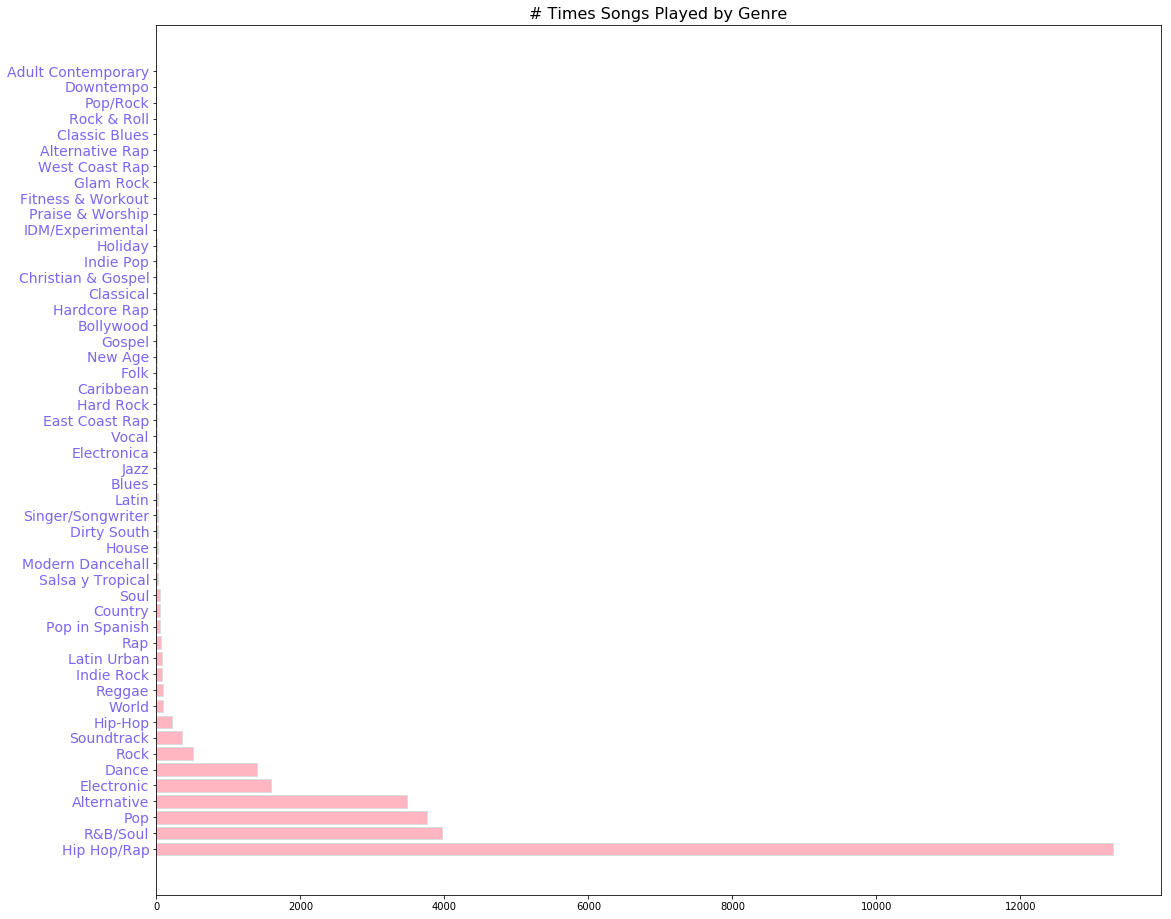

In [48]:
plt.figure(figsize=(18,16))
plt.barh(genre_freq['Genre'], genre_freq['Content Name'], color='lightpink', edgecolor='gainsboro')
plt.yticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')  
plt.style.use('fast')
plt.title('# Times Songs Played by Genre', fontname = 'Helvetica', fontsize = 16)
plt.show()

By far, Hip Hop / Rap songs were played the most, followed by R&B / Soul as a distant second most.

There is a class imbalance with Genre that will likely require processing before performing final model.

## Time-series analysis

It would be interesting to view these results by period - either yearly or quarterly. I'll complete initial time-series analysis to uncover trends in artists played, songs played, and genre played.

First, I'll plot music frequency over time.

_View play count over time (days)_

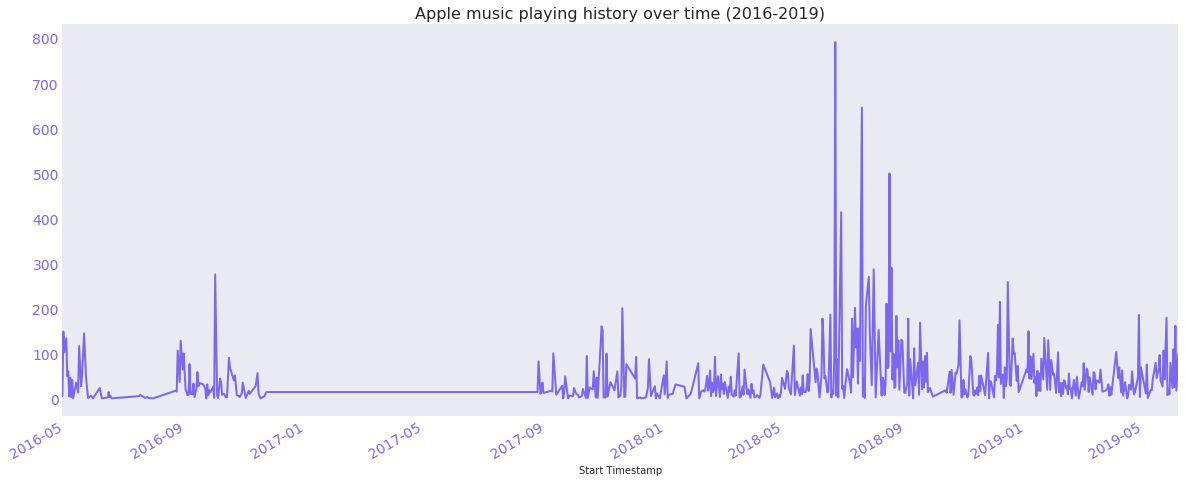

In [56]:
with plt.style.context(('seaborn-dark')):
    play_count.plot(figsize=(20, 8), color='mediumslateblue', linewidth=2)
    plt.title("Apple music playing history over time (2016-2019)", fontname = 'Helvetica', fontsize = 16)
    plt.xticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')
    plt.yticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')  

_View play count by month_

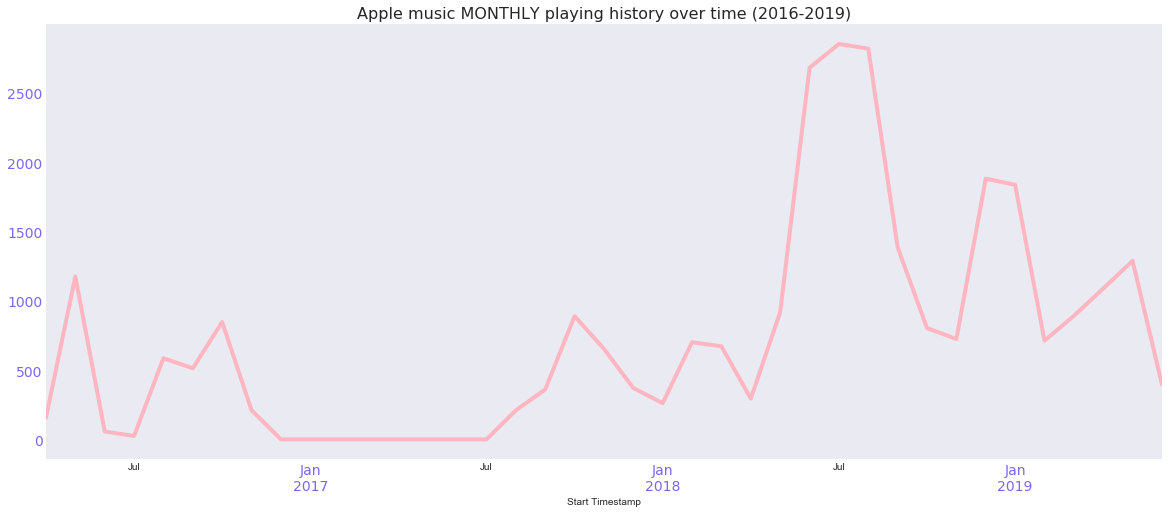

In [58]:
with plt.style.context(('seaborn-dark')):
    fig = plt.figure(figsize=(20, 8))
    play_count_month.plot(color='lightpink', linewidth=4)
    plt.title("Apple music MONTHLY playing history over time (2016-2019)", fontname = 'Helvetica', fontsize = 16)
    plt.xticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light') 
    plt.yticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')  
    plt.show()

_View play count by year_

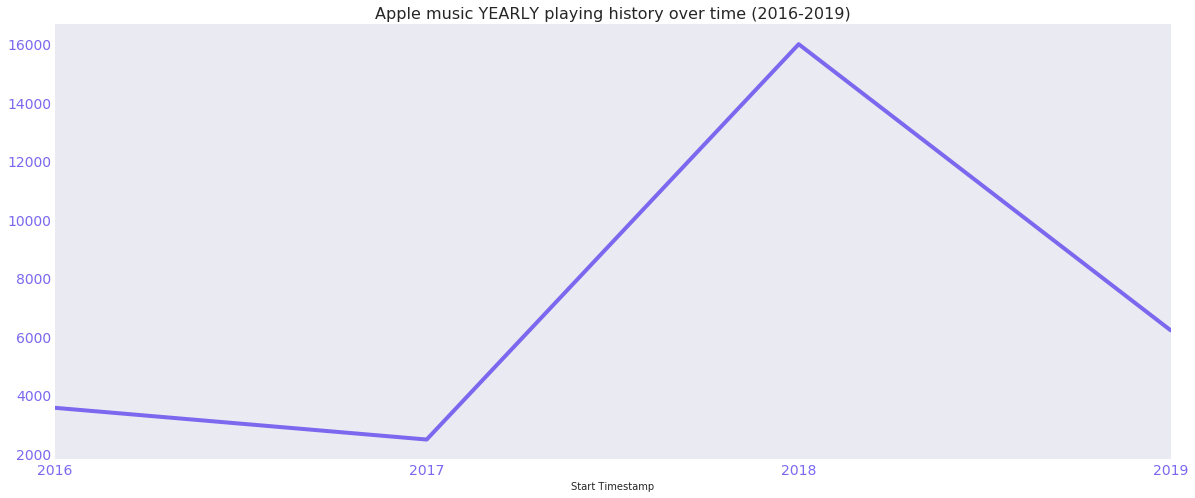

In [61]:
with plt.style.context(('seaborn-dark')):
    play_count_year.plot(figsize=(20, 8), color='mediumslateblue', linewidth=4)
    plt.title("Apple music YEARLY playing history over time (2016-2019)", fontname = 'Helvetica', fontsize = 16)
    plt.xticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')  
    plt.yticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')  

_Time series for top artists played_

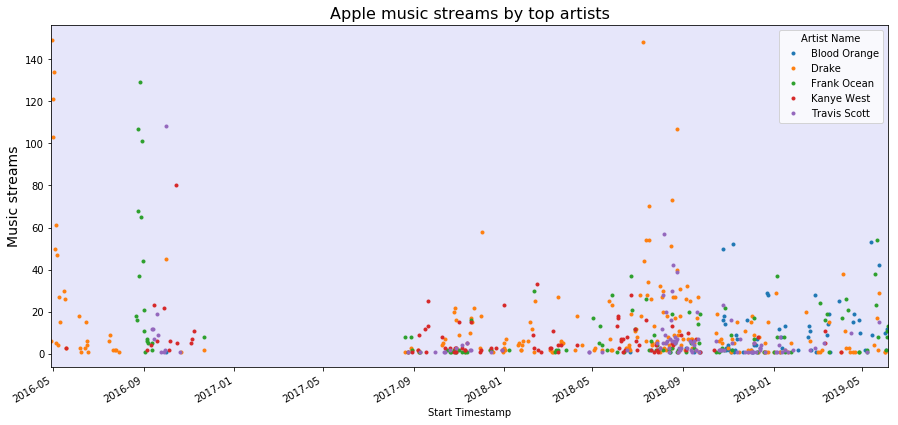

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_facecolor('lavender')
top_artists_df.groupby(['Start Timestamp','Artist Name']).count()['Content Name'].unstack().plot(ax=ax, style='.')
plt.title('Apple music streams by top artists', fontsize=16, color='black', fontname ='Heltivica light')
plt.ylabel('Music streams', fontsize=14, color='black', fontname ='Heltivica light')
plt.show()
#format text

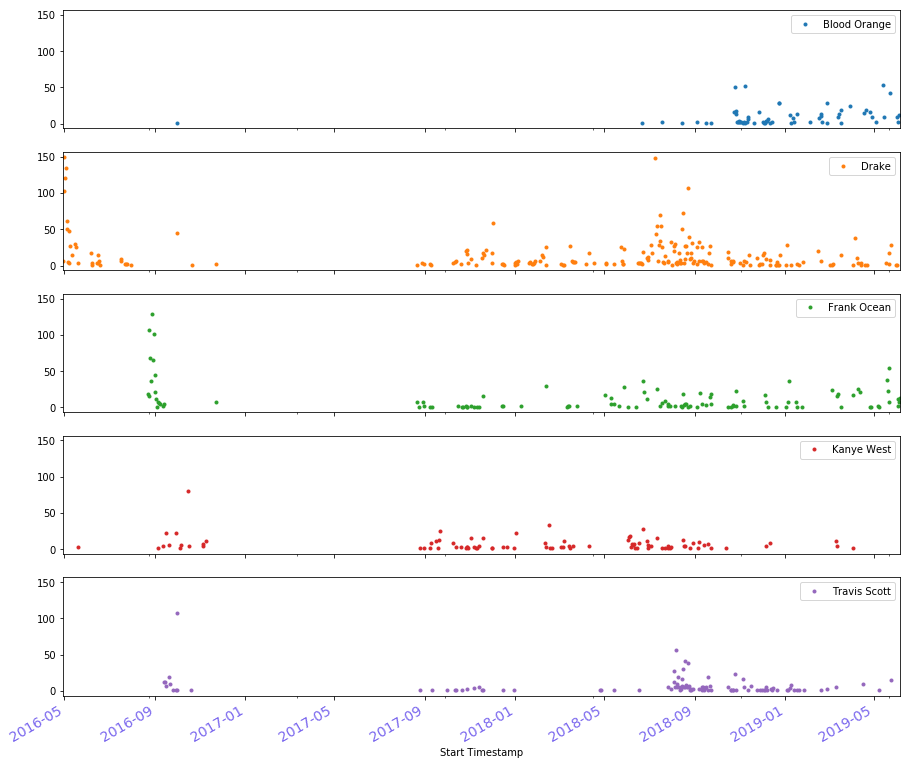

In [66]:
fig, ax = plt.subplots(figsize=(15,14))
ax.set_facecolor('lavender') 
top_artists_df.groupby(['Start Timestamp','Artist Name']).count()['Content Name'].unstack().plot(ax=ax, style='.', subplots=True, sharey=True, sharex=True) 
plt.xticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')
plt.show()

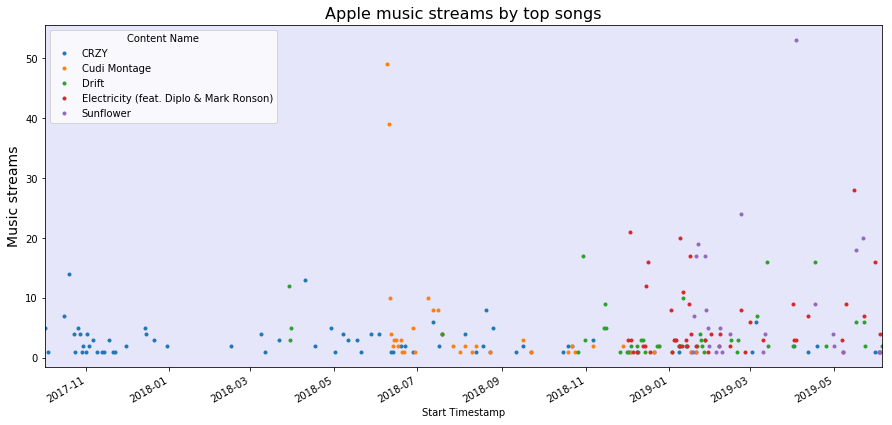

In [69]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_facecolor('lavender')
plt.title('Apple music streams by top songs', fontsize=16, color='black', fontname ='Heltivica light')
plt.ylabel('Music streams', fontsize=14, color='black', fontname ='Heltivica light')
top_songs_df.groupby(['Start Timestamp','Content Name']).count()['Artist Name'].unstack().plot(ax=ax, style='.')
plt.show()

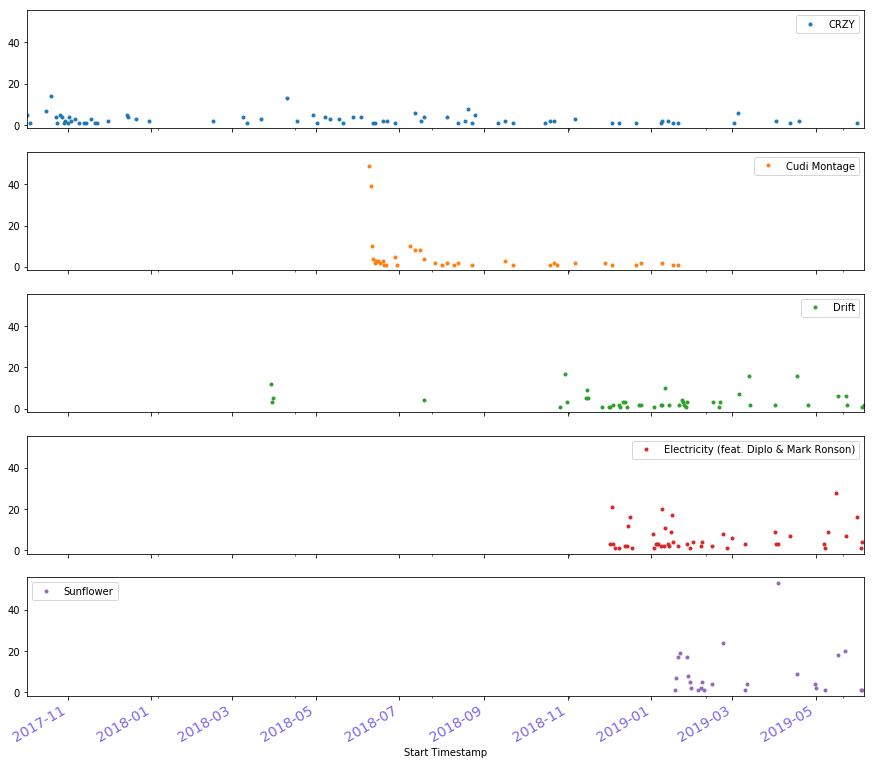

In [70]:
fig, ax = plt.subplots(figsize=(15,14))
top_songs_df.groupby(['Start Timestamp','Content Name']).count()['Artist Name'].unstack().plot(ax=ax, style='.', subplots=True, sharey=True, sharex=True)
ax.set_facecolor('lavender')
plt.xticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')
plt.show()

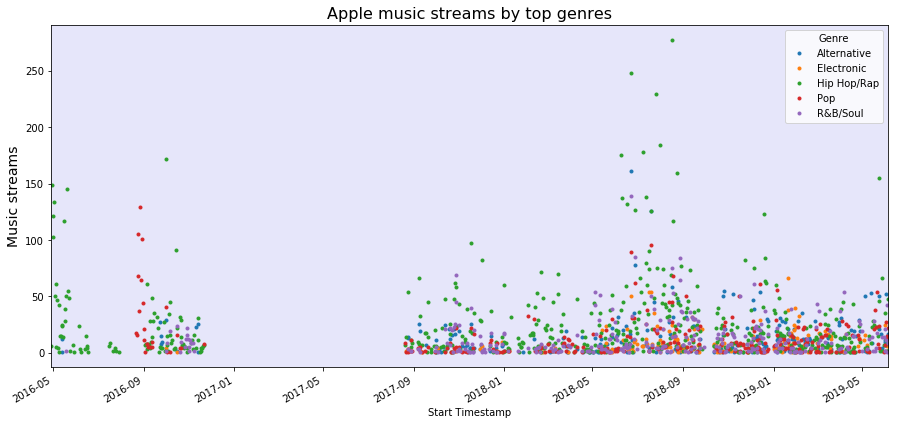

In [73]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_facecolor('lavender')
top_genres_df.groupby(['Start Timestamp','Genre']).count()['Content Name'].unstack().plot(ax=ax, style='.')
plt.title('Apple music streams by top genres', fontsize=16, color='black', fontname ='Heltivica light')
plt.ylabel('Music streams', fontsize=14, color='black', fontname ='Heltivica light')
plt.show()

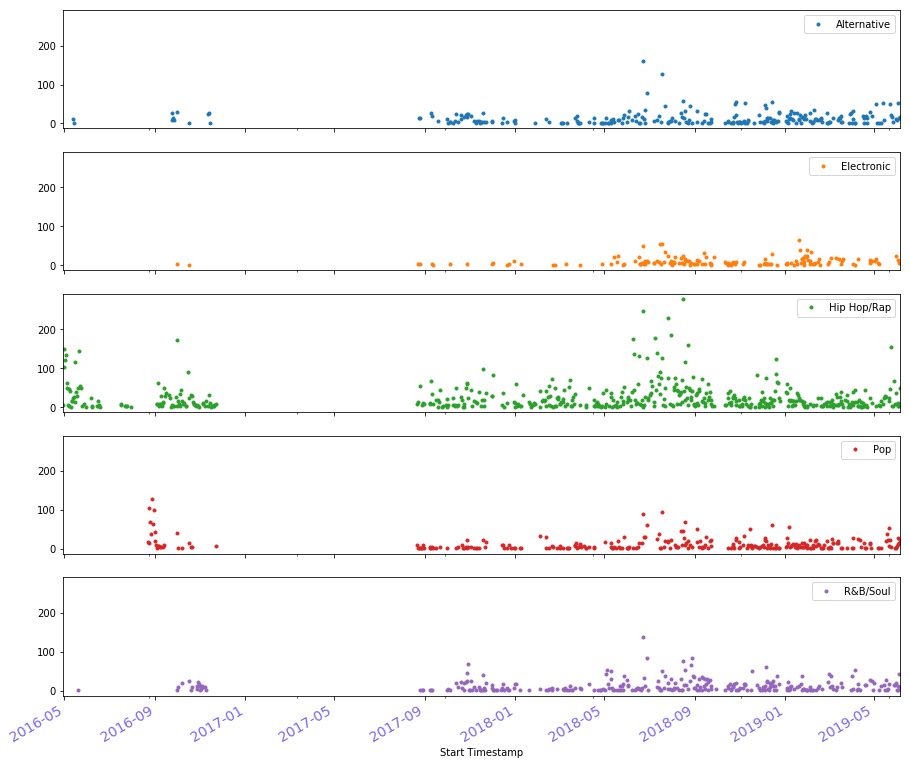

In [74]:
fig, ax = plt.subplots(figsize=(15,14))
ax.set_facecolor('lavender')
top_genres_df.groupby(['Start Timestamp','Genre']).count()['Content Name'].unstack().plot(ax=ax, style='.', subplots=True, sharey=True, sharex=True)
plt.xticks(fontsize=14, color='mediumslateblue', fontname ='Heltivica light')
plt.show()

From these visualizations, I notice that I've played Hip Hop most consistently through the time period, with a considerable uptick in Summer 2018. I have also played more electronic music since Spring 2018.

The list of songs for analysis is available. Next, will look into gathering lyrics for each song by web scraping the Genius.com platform. BeauifulSoup should be effective with these tasks.

The process for compilling lyrics for all of the songs is as follows:
1. Creating API key
2. Create function to determine respective path for each song
3. Create function to request and extract lyrics text
4. Create function to take lyrics, artist, and song name and append to appropriate lists

## API connections and webscrapping

I want the following flow for my lyrics function:
    
    The lyrics function should take in a dictionary with a list of artists and songs as well as an api key, and then return a dictionary with raw text of song lyrics for every song and artist.
    Within the lyrics function, there should be a function that uses a api search to return the song url path.
    Within the generate_song_path function, there should be a function that uses the inputs to return url parameters.
    The response function should take in the inputs and return url parameter.

_Header to store and pass API key_

In [75]:
headers = {
    'Authorization': 'Bearer {}'.format(api_key),
}

A function is needed to output the correct url params to be used as a query, when provided the artist and song.

_Function to get json response_

In [76]:
api_key = 'E8ftkE_LrWhcKrmozlcDuqRWj4EeXSUtD1tFyTAI-SbZ7fnncIuY_0Mr58HHBvst'
def genius_response(song, artist, api_key):
    song_name = song #update
    artist_name = artist #update
    url_params = song_name.replace(" ", "%20") + "%20" + artist_name.replace(" ", "%20")
    return url_params

_Test response function_

In [77]:
genius_response("again", "janet jackson", api_key)

'again%20janet%20jackson'

_Test get request and explore the output_

In [78]:
testss = requests.get('https://api.genius.com/search?q=drake', headers=headers)
testss.json()['response']['hits'][0]['result']

{'annotation_count': 20,
 'api_path': '/songs/3315890',
 'full_title': "God's Plan by\xa0Drake",
 'header_image_thumbnail_url': 'https://images.genius.com/921b81a80b404f357609b3884052312e.300x169x1.jpg',
 'header_image_url': 'https://images.genius.com/921b81a80b404f357609b3884052312e.1000x563x1.jpg',
 'id': 3315890,
 'lyrics_owner_id': 1507505,
 'lyrics_state': 'complete',
 'path': '/Drake-gods-plan-lyrics',
 'pyongs_count': 831,
 'song_art_image_thumbnail_url': 'https://images.genius.com/91dfa9a875349f2c1a4c8c6420642c04.300x300x1.jpg',
 'song_art_image_url': 'https://images.genius.com/91dfa9a875349f2c1a4c8c6420642c04.600x600x1.jpg',
 'stats': {'unreviewed_annotations': 0,
  'concurrents': 5,
  'hot': False,
  'pageviews': 8078161},
 'title': 'God’s Plan',
 'title_with_featured': "God's Plan",
 'url': 'https://genius.com/Drake-gods-plan-lyrics',
 'primary_artist': {'api_path': '/artists/130',
  'header_image_url': 'https://images.genius.com/cbb7ed09071d202a9701717494c04bf8.1000x563x1.j

A function is needed to execute the get request for the respective html file of a song on the Genius platform, and then return a specific path url for the appropriate song. This is done through the search endpoint of the Genius API. Given that a search can provide multiple results, a condition is included in the function to ensure that the correct file for a given artist and song is selected.

_Function to find song id_

In [80]:
def genius_song_path(song_, artist_, api_key):
    song_path = song_
    artist_path = artist_
    url = 'https://api.genius.com/search?q='
    genius_url_params = genius_response(song_path, artist_path, api_key)
    headers = {'Authorization': 'Bearer {}'.format(api_key),}
    try:
        r = requests.get(url + str(genius_url_params), headers=headers)
    #     time.sleep(1)  #toggled off
        included = []
        for row in r.json()['response']['hits']:
            artist_r = row['result']['primary_artist']['name'] 
            if str(artist_r).lower() == str(artist_path).lower():
                included.append(row)
        if len(included) != 0:
            path = included[0]['result']['path'] #assuming that genius returns most relevent result first and then added to 'included' first
            #need to add condition if there isnt a match which means included list is empty and not callable
            return path #make sure this is path (temp change to row)
    except:
        None

In [81]:
genius_song_path("same drugs", "chance the rapper", api_key)

'/Chance-the-rapper-same-drugs-lyrics'

Finally, a function is needed to provide the lyrics for a song after scrapping the Genius platform with BeautifulSoup. The previous functions created above will be nested within this final function to streamline the process. The output will be four lists: artist_list, song_list, song_lyrics, and failed entries.

_Function to retrieve song lyrics_

In [82]:
def genius_lyrics(list_of_songs, api_key): # change so that parameter is dictionary
#     lyrics_dict = {} #updated dictionary
    artist_list = []
    song_list = []
    song_lyrics = []
    failed_entries = {}
    # create loop for every dictionary entry
    for track in list_of_songs:
        g_path = genius_song_path(track[1], track[0], api_key)
        headers = {'Authorization': 'Bearer {}'.format(api_key),}
        try:
            get_request = requests.get('https://www.genius.com'+str(g_path)) #genius
            soup = BeautifulSoup(get_request.content, 'html.parser')
            soup.prettify()
            raw_lyrics = soup.p.get_text()
            song_g = track[1]
            artist_g = track[0]
            song_list.append(song_g)
            artist_list.append(artist_g)
            song_lyrics.append(raw_lyrics)
        except:
            failed_entries[artist_g] = [song_g]
#     lyrics_dict = dict(zip(artist_list, song_lyrics.items())) #delete
    return artist_list, song_list, song_lyrics, failed_entries 

The lyrics function is essembled correctly. Next, the list of songs and artists will be passed into the function, and returning seperate lists for use in the NLP analysis.

## NLP Analysis

Now that the necessary data is sourced and organized, the next phase will focus on preprocessing the text data with the use of Natural Language Processing tools. For a series of analysis, the text will be tokenize, vectorized, and transformed in additional manners to create embeddings and to classify target features in the model.

### Frequency distributions

In [102]:
lyrics_freqdist = FreqDist(lyrics_words_stopped)
lyrics_freqdist.most_common(20)

[('yeah', 1556),
 ('like', 1495),
 ('know', 1262),
 ("i'm", 1088),
 ('oh', 1033),
 ('got', 1019),
 ('love', 826),
 ('get', 818),
 ('go', 666),
 ('make', 538),
 ('need', 503),
 ('say', 486),
 ('one', 481),
 ('see', 468),
 ('never', 464),
 ('baby', 462),
 ('time', 460),
 ('nigga', 456),
 ('let', 434),
 ('want', 432)]

Not very insightful or surprising. "Money" is notably missing from the top 10.

### Word embeddings

In [123]:
wv = model.wv

In [124]:
wv.most_similar('prince')

[('charm', 0.9706283807754517),
 ('Seduction', 0.9456403255462646),
 ('policy', 0.9210214614868164),
 ('bloodshed', 0.9126796126365662),
 ('aligned', 0.9092975854873657),
 ('fathers', 0.9048280715942383),
 ('throne', 0.900916576385498),
 ('planets', 0.9004904627799988),
 ('forsaken', 0.896043062210083),
 ('well-wishes', 0.8932774066925049)]

In [125]:
wv.most_similar('love')

[('hear', 0.7296684980392456),
 ('believe', 0.7241459488868713),
 ('ohhhhh', 0.723922610282898),
 ('free', 0.7170172929763794),
 ('feel', 0.7157695293426514),
 ('J.T.', 0.7110484838485718),
 ('think', 0.7080705165863037),
 ('die', 0.7047517895698547),
 ('give', 0.7037411332130432),
 ('truth', 0.7022803425788879)]

Here we see that most of the output are other artists. Let me pass in a song instead.

In [126]:
wv.most_similar('hate')

[('gave', 0.7946162223815918),
 ('Suwoo', 0.7699368000030518),
 ('tip-top', 0.7649836540222168),
 ('die', 0.7647901773452759),
 ('lie', 0.7599247097969055),
 ('guess', 0.758621335029602),
 ('hear', 0.7526588439941406),
 ('pretend', 0.7458049058914185),
 ('am', 0.7434628009796143),
 ('brang', 0.7348159551620483)]

Word embeddings don't seem very helpful yet. I'll attempt to predict a song's genre using a classification model with song lyrics passed in.

### Classification

_Split data into train and test sets_

In [146]:
X_train, X_test, y_train, y_test = train_test_split(lyrics_df['Lyrics'], lyrics_df.Genre)

_Create pipelines_

In [148]:
text_clf = Pipeline([('count_vectorizer', CountVectorizer()), #why is this included seperately if tfidf does same step?
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

In [151]:
train_preds = text_clf.predict(X_train)
accuracy_score(y_train, train_preds)

0.4745222929936306

In [152]:
test_preds = text_clf.predict(X_test)
accuracy_score(y_test, test_preds)

0.4380952380952381

In [159]:
print(metrics.classification_report(y_test, test_preds))

                  precision    recall  f1-score   support

     Alternative       0.00      0.00      0.00         9
         Country       0.00      0.00      0.00         1
           Dance       0.00      0.00      0.00         8
      Electronic       0.00      0.00      0.00        10
     Hip Hop/Rap       0.44      1.00      0.61        46
            Jazz       0.00      0.00      0.00         1
Modern Dancehall       0.00      0.00      0.00         1
             Pop       0.00      0.00      0.00        11
        R&B/Soul       0.00      0.00      0.00        11
            Rock       0.00      0.00      0.00         5
      Soundtrack       0.00      0.00      0.00         2

        accuracy                           0.44       105
       macro avg       0.04      0.09      0.06       105
    weighted avg       0.19      0.44      0.27       105



__Classification with GloVe__

In [166]:
rf = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)), ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)), ('Logistic Regression', LogisticRegression())])

In [167]:
models = [('Random Forest', rf), ('Support Vector Machine', svc), ('Logistic Regression', lr)]

In [168]:
scores = [(name, cross_val_score(model, lyrics_df["Lyrics"], target, cv=2).mean()) for name, model, in models]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [169]:
scores

[('Random Forest', 0.449267925561029),
 ('Support Vector Machine', 0.4657681080094873),
 ('Logistic Regression', 0.4657681080094873)]

These models only provide slight improvement than Multinomial NB.

### SMOTE to address class imbalance

In [188]:
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

Multinomial Naive Bayes
Training Accuracy: 0.9141 		 Testing Accuracy: 0.8269

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.9954 		 Testing Accuracy: 0.9021


In [189]:
print(metrics.classification_report(y_test, nb_test_preds))

              precision    recall  f1-score   support

 Alternative       0.68      0.81      0.74        47
       Dance       0.85      0.98      0.91        46
  Electronic       0.83      1.00      0.91        48
 Hip Hop/Rap       0.30      0.07      0.12        42
     Hip-Hop       1.00      1.00      1.00        55
         Pop       0.70      0.91      0.79        43
    R&B/Soul       1.00      0.64      0.78        53
        Rock       0.89      0.93      0.91        55
  Soundtrack       0.83      1.00      0.91        50

    accuracy                           0.83       439
   macro avg       0.79      0.81      0.78       439
weighted avg       0.80      0.83      0.80       439



Normalized confusion matrix


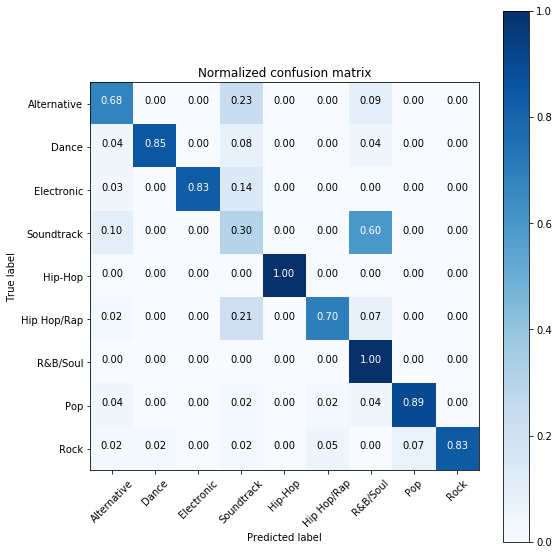

In [209]:
cnf_matrix = confusion_matrix(nb_test_preds, y_test)

plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                      title='Normalized confusion matrix')


plt.show()

In [208]:
print(metrics.classification_report(y_test, rf_test_preds))

              precision    recall  f1-score   support

 Alternative       0.90      0.79      0.84        47
       Dance       0.93      0.93      0.93        46
  Electronic       0.98      0.98      0.98        48
 Hip Hop/Rap       0.53      0.83      0.65        42
     Hip-Hop       1.00      1.00      1.00        55
         Pop       0.97      0.77      0.86        43
    R&B/Soul       0.96      0.83      0.89        53
        Rock       0.98      0.98      0.98        55
  Soundtrack       1.00      0.96      0.98        50

    accuracy                           0.90       439
   macro avg       0.92      0.90      0.90       439
weighted avg       0.93      0.90      0.91       439



Normalized confusion matrix


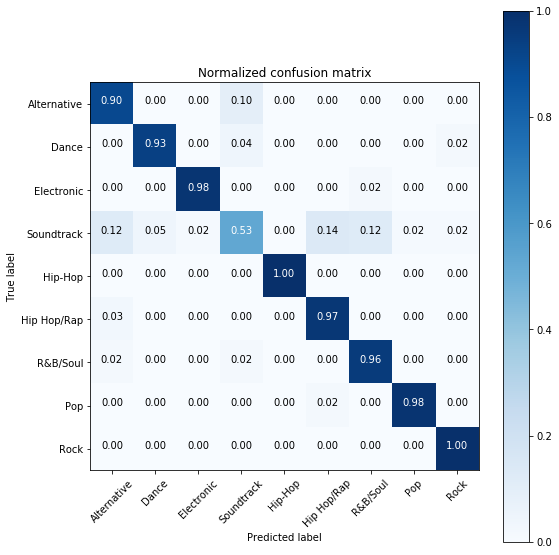

In [210]:
cnf_matrix = confusion_matrix(rf_test_preds, y_test)

plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

SMOTE improved performance significantly. I'm concerned that the synthetic samples caused overfitting that would lead to poor predictions for future "real" and distinct lyrics. For greater insight on this potential issue, I'll complete classification with undersampling and compare.

### Undersampling to address class imbalance

In [216]:
X_train, X_test, y_train, y_test = train_test_split(und_samp_data, und_samp_target, test_size=.4)

In [217]:
nb_clf = Pipeline([('count_vectorizer', CountVectorizer()), #why is this included seperately if tfidf does same step?
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])
rf_clf = Pipeline([('count_vectorizer', CountVectorizer()), #why is this included seperately if tfidf does same step?
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                    ])

In [218]:
pipelines = [nb_clf, rf_clf]

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf_vectorizer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Training Accuracy: 0.9867 	

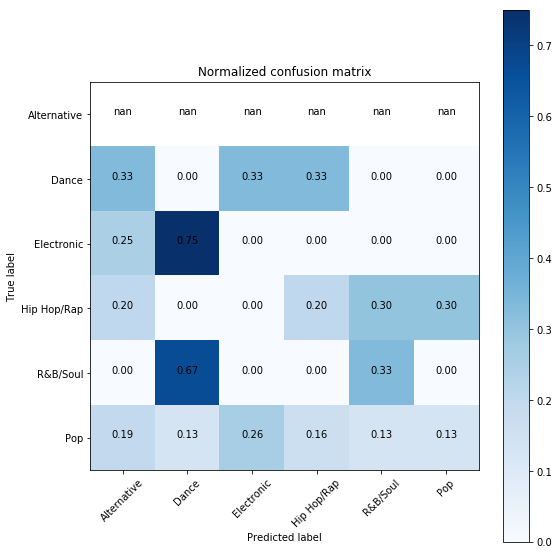

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vo...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

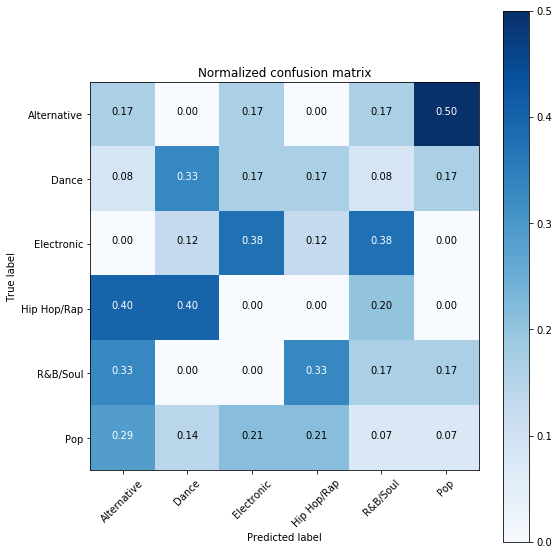

In [220]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)
    print(pipe)
    print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(train_score, test_score))
    print("")
    print('-'*70)
    print("")
    print(metrics.classification_report(y_test, test_preds))
    print("")
    print('-'*70)
    print("")
    cnf_matrix = confusion_matrix(test_preds, y_test)

    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                      title='Normalized confusion matrix')
    plt.show()

In the case, performance was extremely weak. The sample size for each class was below 10 in most cases, a polar opposite from the previous oversampling issue.

__Undersample with One-vs-All for Hip Hop / Rap__

I'll adjust the previous undersampling approach to a 'One-vs-All' classification to determine whether a song has a Hip Hop / Rap genre or not.

In [229]:
X_train, X_test, y_train, y_test = train_test_split(upd_df.Lyrics, upd_df['Hip Hop/Rap'], test_size=.4)

In [230]:
nb_clf = Pipeline([('count_vectorizer', CountVectorizer()), #why is this included seperately if tfidf does same step?
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])
rf_clf = Pipeline([('count_vectorizer', CountVectorizer()), #why is this included seperately if tfidf does same step?
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                    ])

In [231]:
pipelines = [nb_clf, rf_clf]

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf_vectorizer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Training Accuracy: 0.7942 	

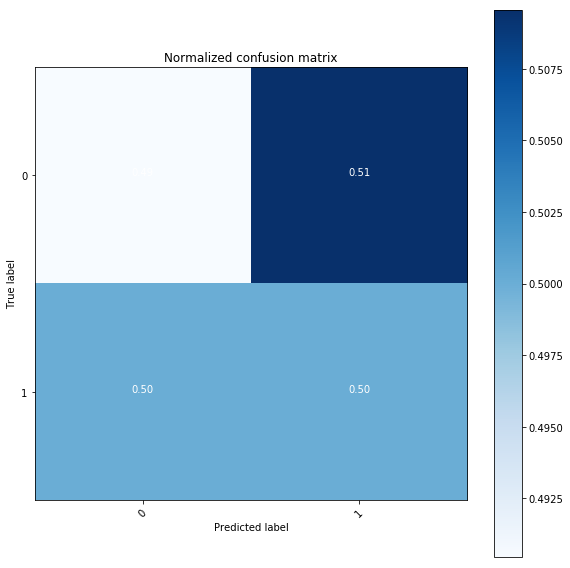

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vo...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

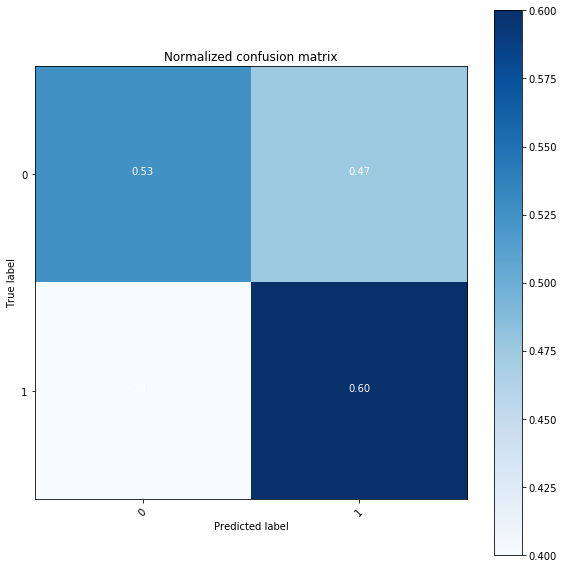

In [233]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)
    print(pipe)
    print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(train_score, test_score))
    print("")
    print('-'*70)
    print("")
    print(metrics.classification_report(y_test, test_preds))
    print("")
    print('-'*70)
    print("")
    cnf_matrix = confusion_matrix(test_preds, y_test)
    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(cnf_matrix, classes=list(set(y_train)), normalize=True,
                      title='Normalized confusion matrix')
    plt.show()

__Predict top artist?__

Drake

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.8876 		 Testing Accuracy: 0.7404
Confusion matrix, without normalization


Random Forest
Training Accuracy: 0.9859 		 Testing Accuracy: 0.9298

----------------------------------------------------------------------

Confusion matrix, without normalization


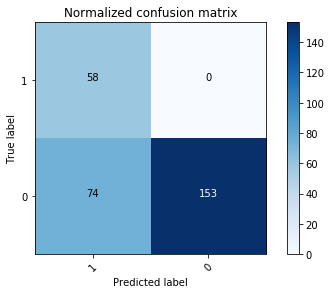

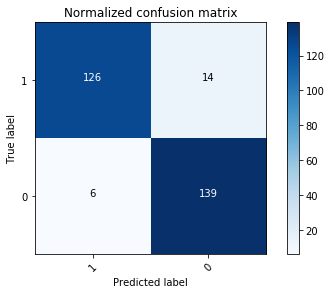

Frank Ocean

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.9394 		 Testing Accuracy: 0.7987
Confusion matrix, without normalization


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.9805

----------------------------------------------------------------------

Confusion matrix, without normalization


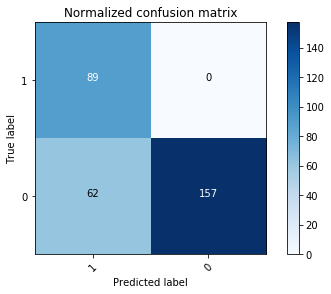

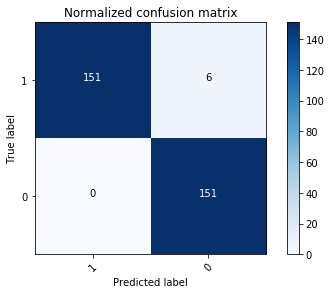

Travis Scott

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.9748 		 Testing Accuracy: 0.931
Confusion matrix, without normalization


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.9843

----------------------------------------------------------------------

Confusion matrix, without normalization


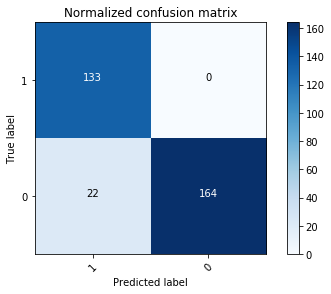

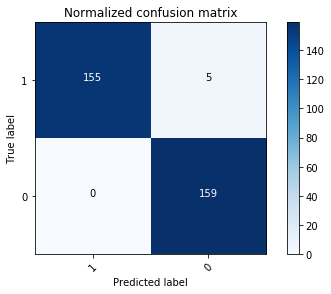

Kanye West

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.8877 		 Testing Accuracy: 0.7753
Confusion matrix, without normalization


Random Forest
Training Accuracy: 0.9979 		 Testing Accuracy: 0.9747

----------------------------------------------------------------------

Confusion matrix, without normalization


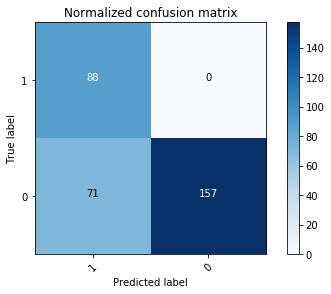

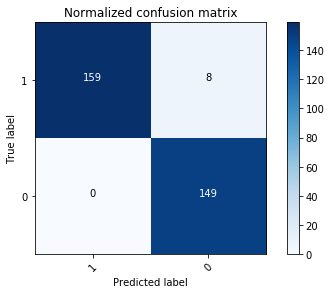

Blood Orange

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.9896 		 Testing Accuracy: 0.9688
Confusion matrix, without normalization


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.9875

----------------------------------------------------------------------

Confusion matrix, without normalization


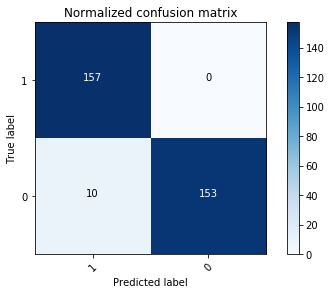

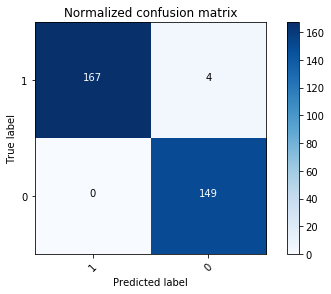

Chance the Rapper

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.9894 		 Testing Accuracy: 0.9905
Confusion matrix, without normalization


Random Forest
Training Accuracy: 0.9979 		 Testing Accuracy: 0.9905

----------------------------------------------------------------------

Confusion matrix, without normalization


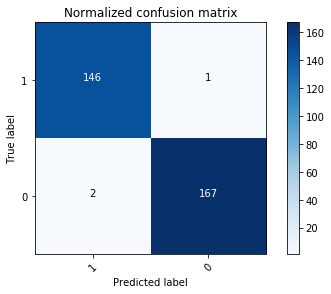

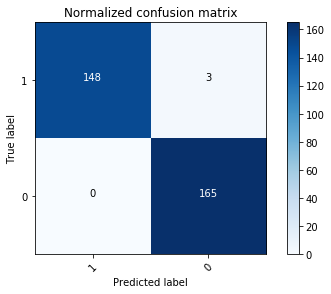

Janelle Monáe

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.9979 		 Testing Accuracy: 0.9688
Confusion matrix, without normalization


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.9969

----------------------------------------------------------------------

Confusion matrix, without normalization


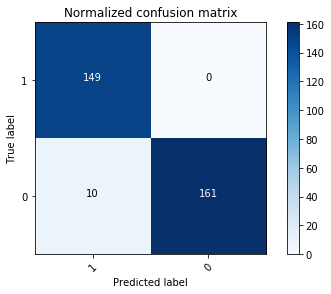

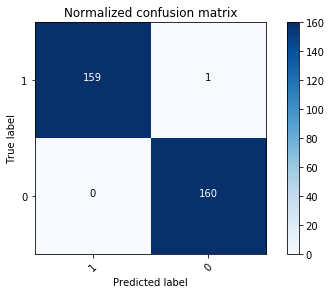

In [257]:
for artist in artist_freq['Artist Name'][:7]:
    artist_name = artist
    df = lyrics_df.copy()
    df['targetName'] = None
    for idx in df.index:
        if df.Artist[idx] == artist_name:
            df['targetName'][idx] = 'Y'
        else:
            df['targetName'][idx] = 'N'
            
    vectorizer = TfidfVectorizer()
    tf_idf_data = vectorizer.fit_transform(df.Lyrics)
    X_resampled, y_resampled = SMOTE(sampling_strategy='all', k_neighbors=1).fit_sample(tf_idf_data, df.targetName)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.4)

    nb_classifier = MultinomialNB()
    rf_classifier = RandomForestClassifier()

    nb_classifier.fit(X_train, y_train)
    nb_train_preds = nb_classifier.predict(X_train)
    nb_test_preds = nb_classifier.predict(X_test)
    
    rf_classifier.fit(X_train, y_train)
    rf_train_preds = rf_classifier.predict(X_train)
    rf_test_preds = rf_classifier.predict(X_test)
    

    nb_train_score = accuracy_score(y_train, nb_train_preds)
    nb_test_score = accuracy_score(y_test, nb_test_preds)
    rf_train_score = accuracy_score(y_train, rf_train_preds)
    rf_test_score = accuracy_score(y_test, rf_test_preds)

    print(artist)
    print("")
    print('-'*70)
    print("")
    print("Multinomial Naive Bayes")
    print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
    cnf_matrix = confusion_matrix(nb_test_preds, y_test)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['1', '0'], normalize=False,
                      title='Normalized confusion matrix')
    
   
    print("\n")
#     print("")
#     print('-'*70)
#     print("")
    print('Random Forest')
    print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
    print("")
    print('-'*70)
    print("")
    cnf_matrix = confusion_matrix(rf_test_preds, y_test)


    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['1', '0'], normalize=False,
                      title='Normalized confusion matrix')

    plt.show()

Drake

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 1.0 		 Testing Accuracy: 0.675
Confusion matrix, without normalization


Random Forest
Training Accuracy: 0.9833 		 Testing Accuracy: 0.55

----------------------------------------------------------------------

Confusion matrix, without normalization


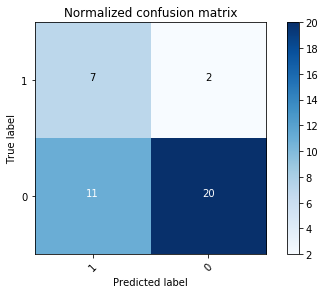

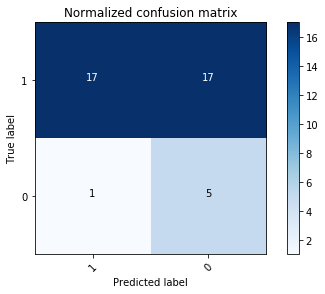

Frank Ocean

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 1.0 		 Testing Accuracy: 0.5294
Confusion matrix, without normalization


Random Forest
Training Accuracy: 0.96 		 Testing Accuracy: 0.6471

----------------------------------------------------------------------

Confusion matrix, without normalization


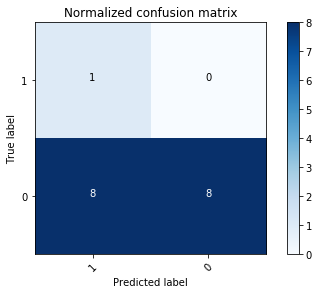

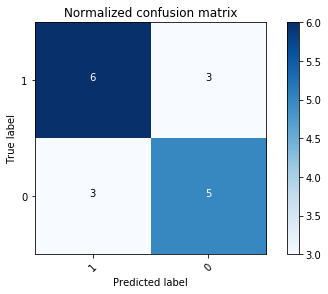

Travis Scott

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.7778 		 Testing Accuracy: 0.2857
Confusion matrix, without normalization


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.7143

----------------------------------------------------------------------

Confusion matrix, without normalization


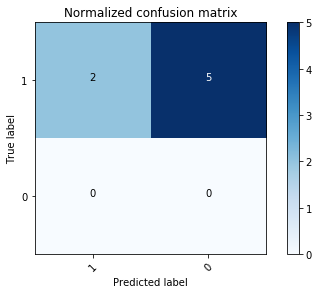

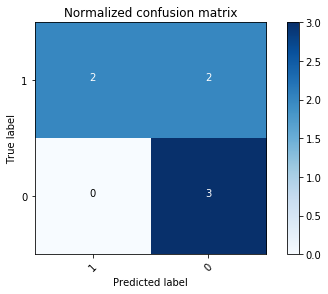

Kanye West

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 1.0 		 Testing Accuracy: 0.5
Confusion matrix, without normalization


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.5

----------------------------------------------------------------------

Confusion matrix, without normalization


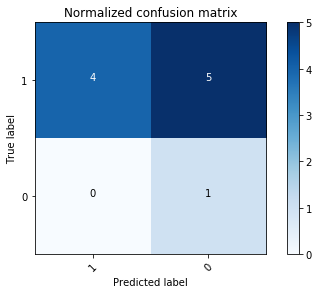

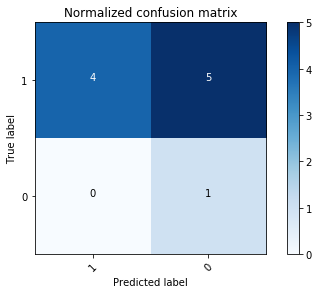

Blood Orange

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 1.0 		 Testing Accuracy: 0.4
Confusion matrix, without normalization


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.4

----------------------------------------------------------------------

Confusion matrix, without normalization


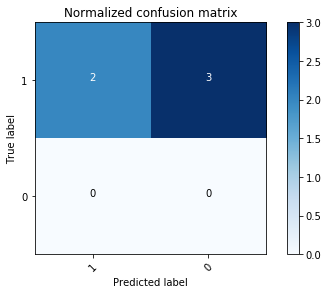

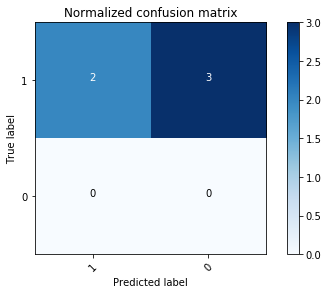

Chance the Rapper

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.8571 		 Testing Accuracy: 0.9
Confusion matrix, without normalization


Random Forest
Training Accuracy: 0.8571 		 Testing Accuracy: 0.9

----------------------------------------------------------------------

Confusion matrix, without normalization


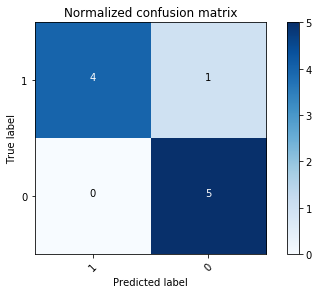

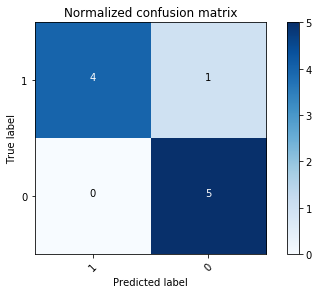

Janelle Monáe

----------------------------------------------------------------------

Multinomial Naive Bayes
Training Accuracy: 0.7143 		 Testing Accuracy: 0.2
Confusion matrix, without normalization


Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.2

----------------------------------------------------------------------

Confusion matrix, without normalization


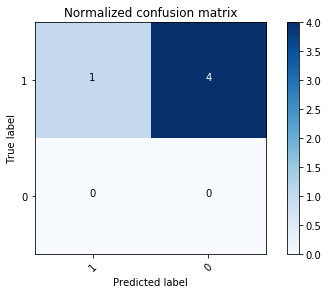

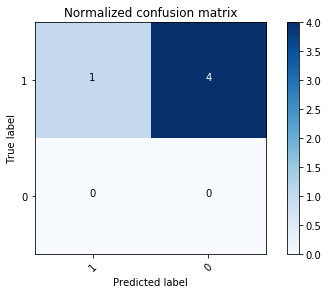

In [278]:
for entry in artist_freq['Artist Name'][:7]:
    artist_name = entry
    df = lyrics_df.copy()
    df['targetName'] = None
    for idx in df.index:
        if df.Artist[idx] == artist_name:
            df['targetName'][idx] = 'Y'
        else:
            df['targetName'][idx] = 'N'
#     display(df)
    
    n_size = df['targetName'].value_counts()['Y']
    artist_set = df[df['targetName']== 'Y']
    random_set = df[df['targetName']== 'N'].sample(n=n_size, replace=False)
    df_final = pd.concat([artist_set, random_set], 0)
       
    vectorizer = TfidfVectorizer()
    tf_idf_data = vectorizer.fit_transform(df_final.Lyrics)
    X_resampled, y_resampled = SMOTE(k_neighbors=1).fit_sample(tf_idf_data, df_final.targetName)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.4)

    nb_classifier = MultinomialNB()
    rf_classifier = RandomForestClassifier()

    nb_classifier.fit(X_train, y_train)
    nb_train_preds = nb_classifier.predict(X_train)
    nb_test_preds = nb_classifier.predict(X_test)
    
    rf_classifier.fit(X_train, y_train)
    rf_train_preds = rf_classifier.predict(X_train)
    rf_test_preds = rf_classifier.predict(X_test)
    

    nb_train_score = accuracy_score(y_train, nb_train_preds)
    nb_test_score = accuracy_score(y_test, nb_test_preds)
    rf_train_score = accuracy_score(y_train, rf_train_preds)
    rf_test_score = accuracy_score(y_test, rf_test_preds)

    print(entry)
    print("")
    print('-'*70)
    print("")
    print("Multinomial Naive Bayes")
    print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
    cnf_matrix = confusion_matrix(nb_test_preds, y_test)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['1', '0'], normalize=False,
                      title='Normalized confusion matrix')
    
   
    print("\n")
#     print("")
#     print('-'*70)
#     print("")
    print('Random Forest')
    print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))
    print("")
    print('-'*70)
    print("")
    cnf_matrix = confusion_matrix(rf_test_preds, y_test)


    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['1', '0'], normalize=False,
                      title='Normalized confusion matrix')

    plt.show()

### Classification with neural networks